In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('mtcars.csv')

print(df.head())

          Unnamed: 0   mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  \
0          Mazda RX4  21.0    6  160.0  110  3.90  2.620  16.46   0   1     4   
1      Mazda RX4 Wag  21.0    6  160.0  110  3.90  2.875  17.02   0   1     4   
2         Datsun 710  22.8    4  108.0   93  3.85  2.320  18.61   1   1     4   
3     Hornet 4 Drive  21.4    6  258.0  110  3.08  3.215  19.44   1   0     3   
4  Hornet Sportabout  18.7    8  360.0  175  3.15  3.440  17.02   0   0     3   

   carb  
0     4  
1     4  
2     1  
3     1  
4     2  


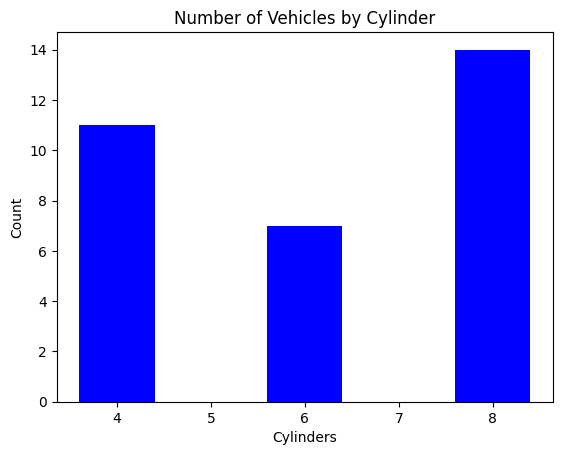

In [9]:
grouped_data = df['cyl'].value_counts()

plt.bar(grouped_data.index, grouped_data.values, color='blue')

plt.title('Number of Vehicles by Cylinder')
plt.xlabel('Cylinders')
plt.ylabel('Count')

plt.show()


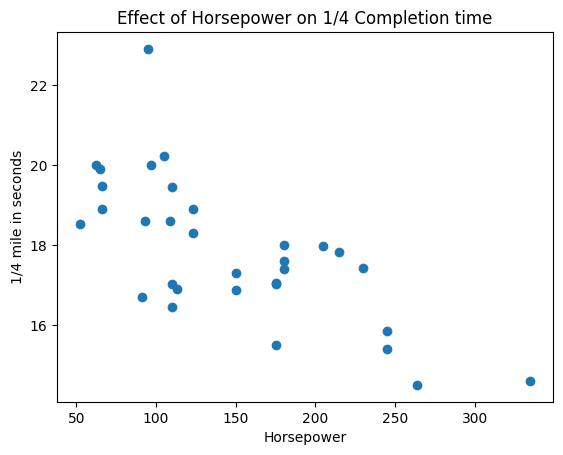

In [10]:
plt.scatter(df['hp'],df['qsec'])

plt.title('Effect of Horsepower on 1/4 Completion time')
plt.xlabel('Horsepower')
plt.ylabel('1/4 mile in seconds')

plt.show()

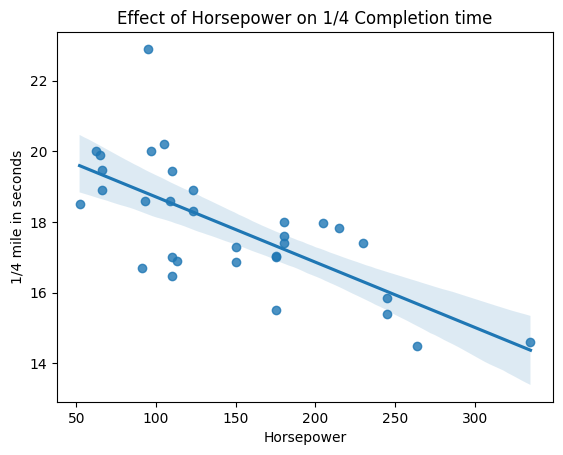

In [11]:
import seaborn as sns

sns.regplot(x=df['hp'], y=df['qsec'])
plt.title('Effect of Horsepower on 1/4 Completion time')
plt.xlabel('Horsepower')
plt.ylabel('1/4 mile in seconds')

plt.show()